##FINAL PROJECT
BREAST CANCER
Problem statement
Breast cancer is the most common malignancy among women, which occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

Machine Learning model is build using the dataset provided which gives the binary classification results as mentioned below.
1 = Malignant (Cancerous) - Present
0 = Benign (Not Cancerous) -Absent

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [18]:
df = pd.read_csv('breastcancer_data.csv', index_col=False)

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df.shape

(569, 32)

In [21]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
df.drop('id', axis =1, inplace=True)

In [23]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##DATA VISUALIZATION

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

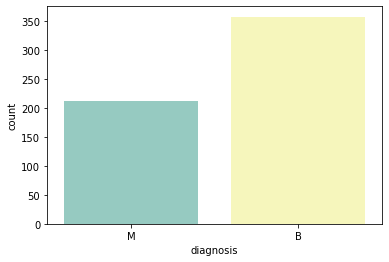

In [25]:
sns.countplot(x=df['diagnosis'],label='Count',palette="Set3")

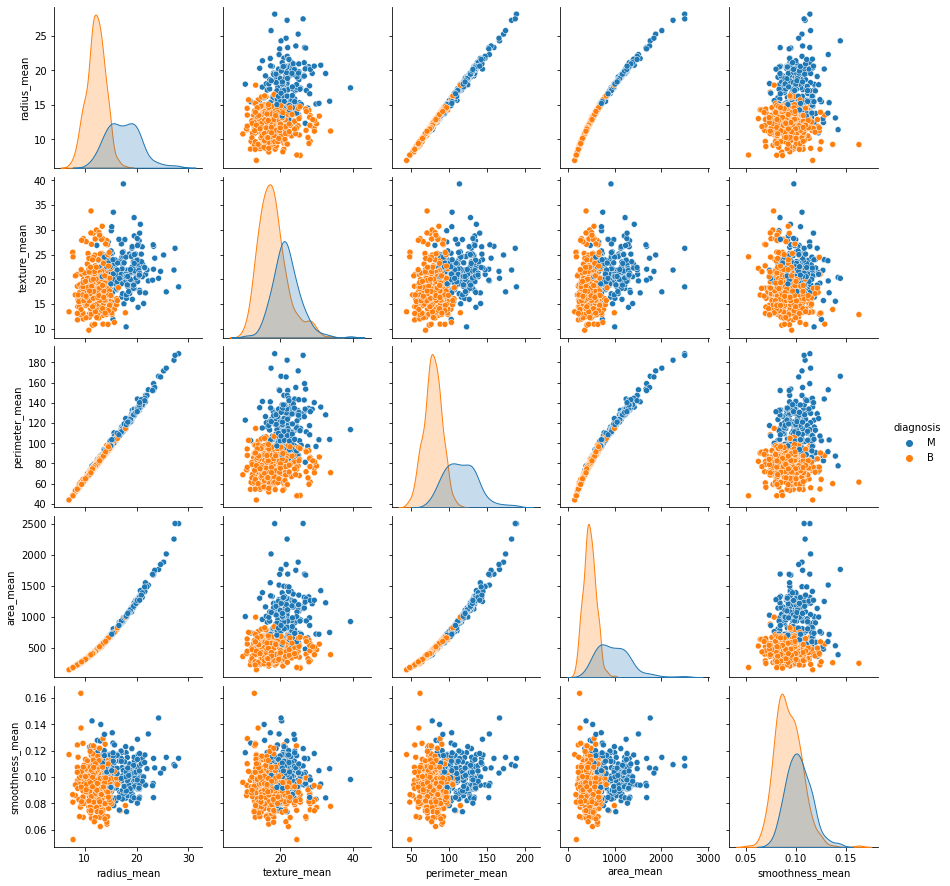

In [26]:
sns.pairplot(df, hue = 'diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean'])

In [27]:
df_mean = df.iloc[:,1:11]
df_se = df.iloc[:,11:22]
df_worst = df.iloc[:,23:]

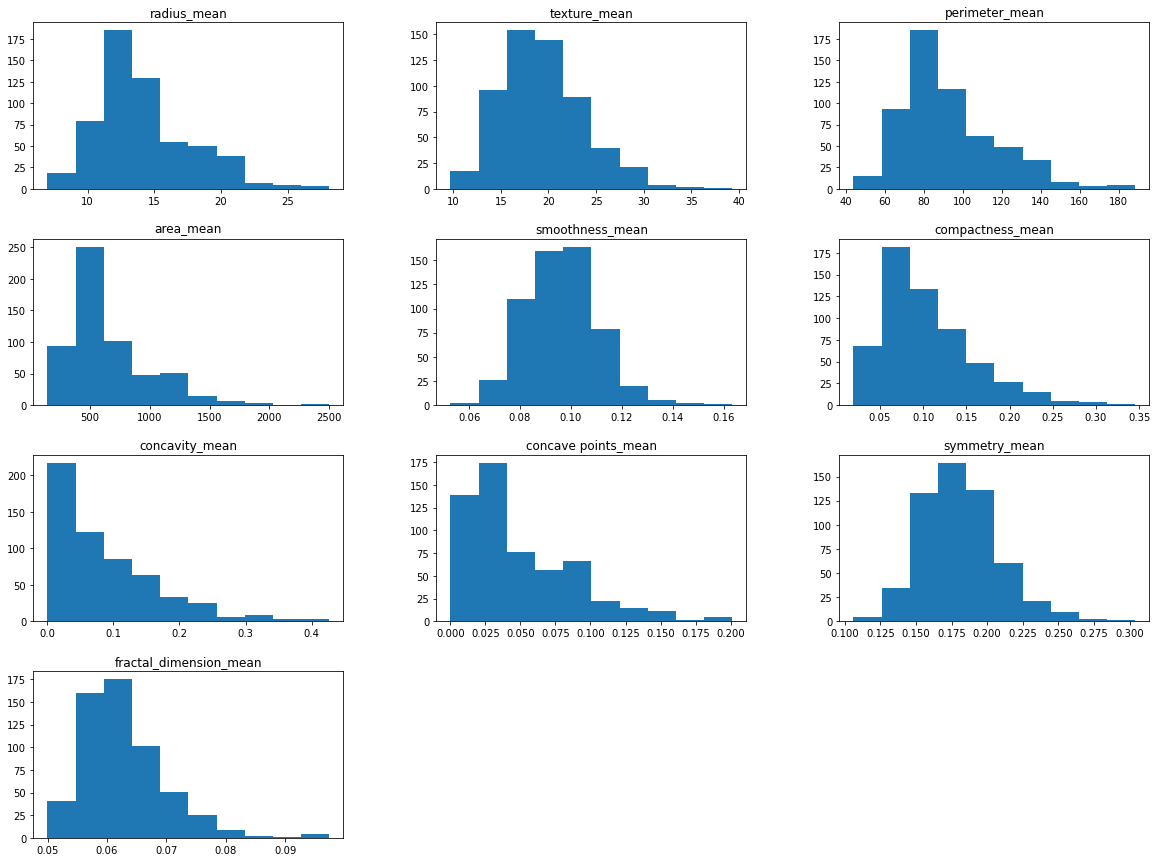

In [31]:
hist_mean = df_mean.hist(bins=10, figsize=(20, 15),grid=False)

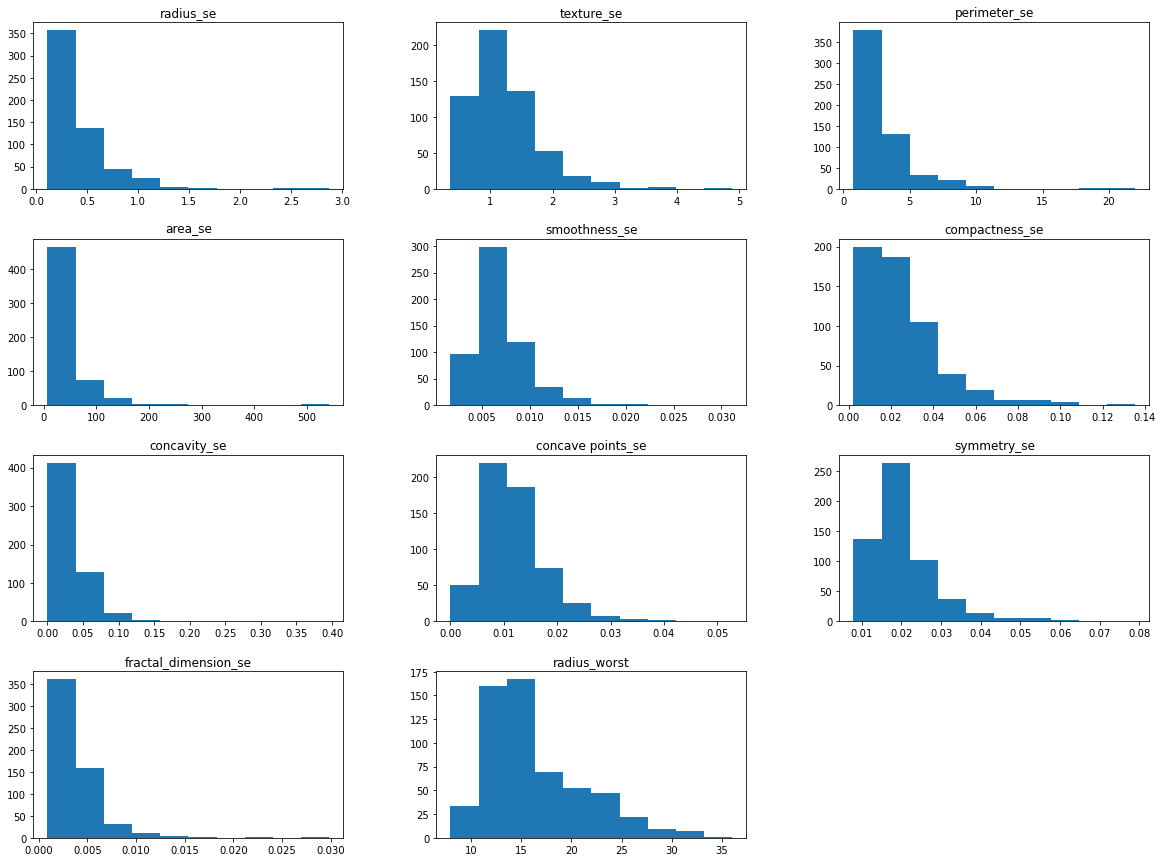

In [32]:
hist_se = df_se.hist(bins=10, figsize=(20, 15),grid=False)

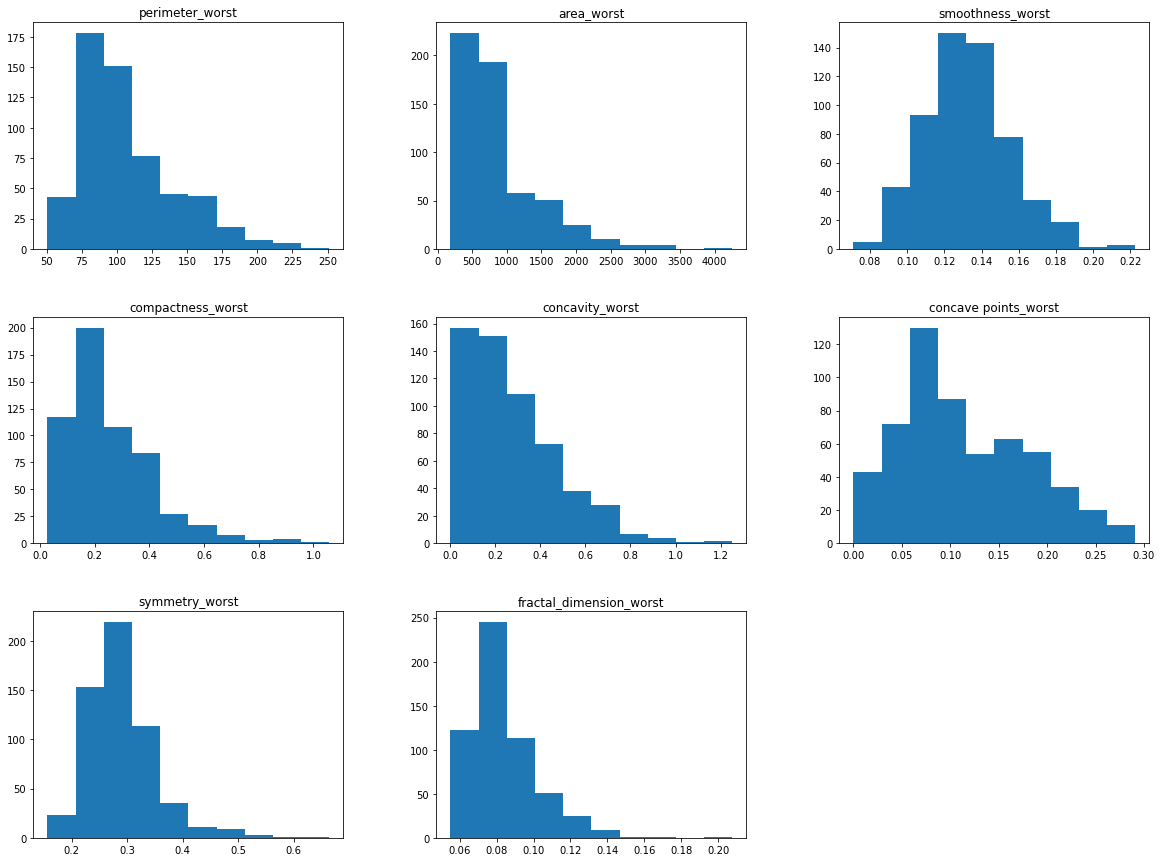

In [33]:
hist_worst = df_worst.hist(bins=10, figsize=(20, 15),grid=False)

<AxesSubplot:>

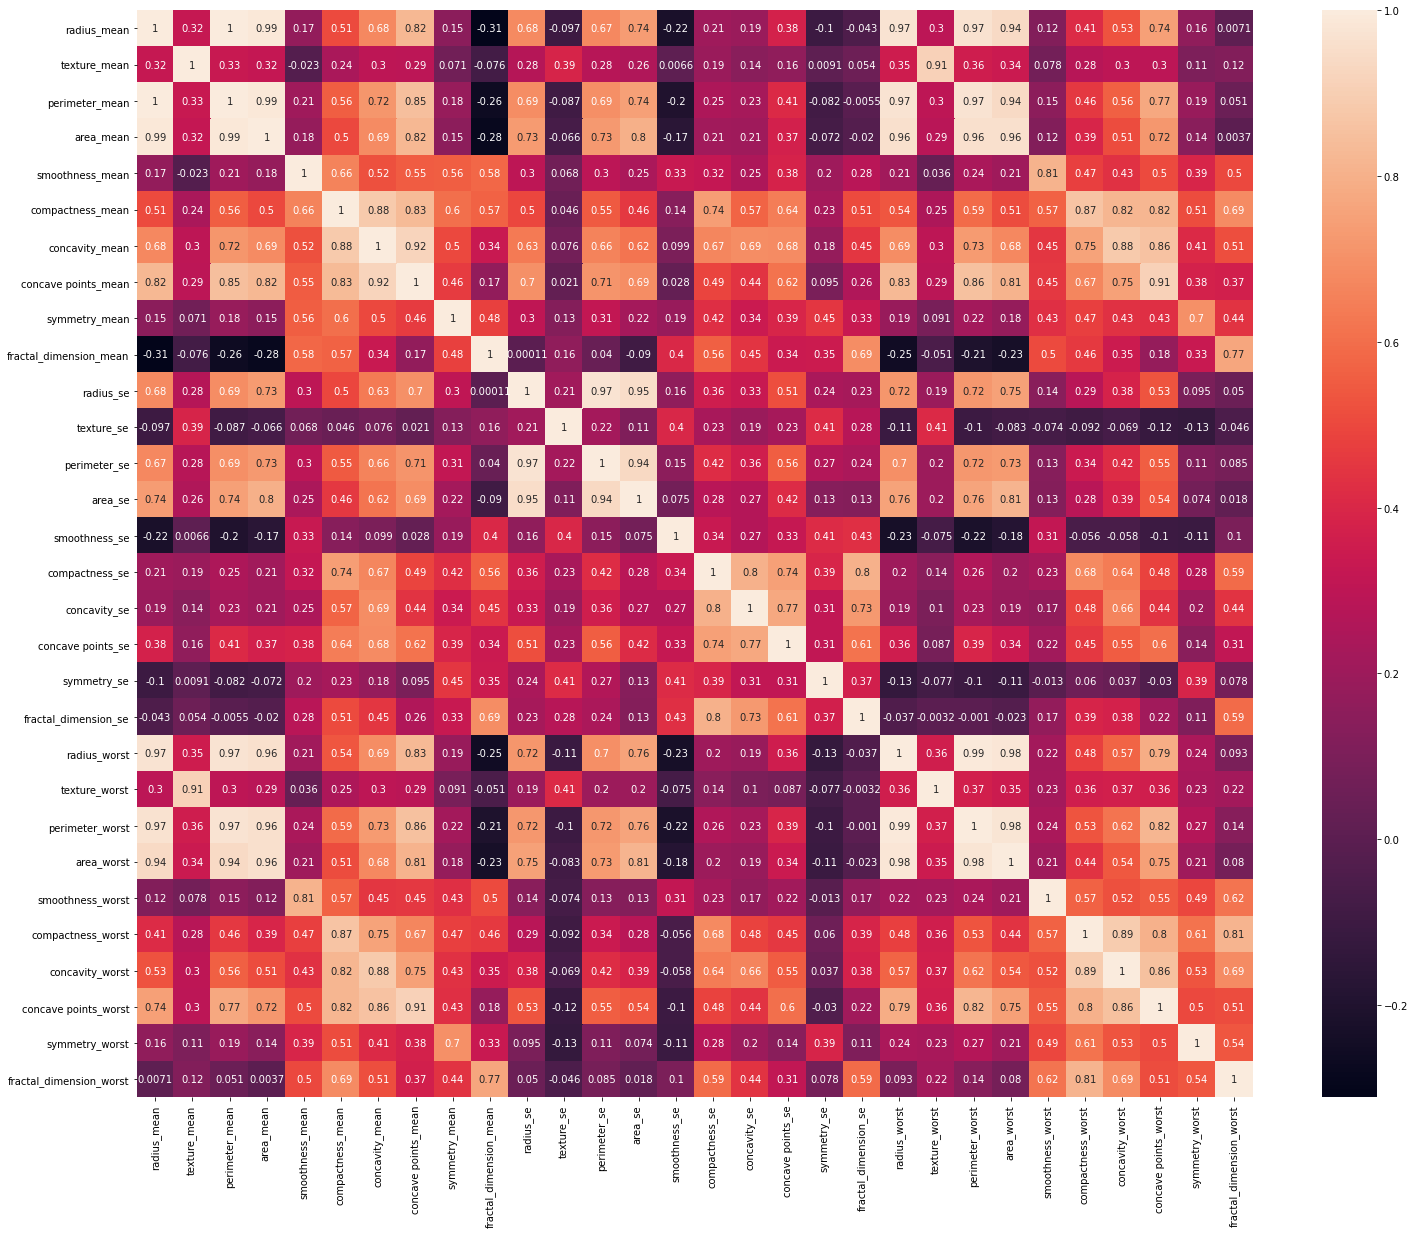

In [34]:
plt.figure(figsize =(25,20))
sns.heatmap(df.corr(), annot =True)

##DATA PRE PROCESSING

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
array = df.values
X = array[:,1:31]
y = array[:,0]

In [37]:
le = LabelEncoder()
y = le.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [39]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

##FEATURE SELECTION

In [40]:
pca = PCA(n_components=10)
fit = pca.fit(Xs)

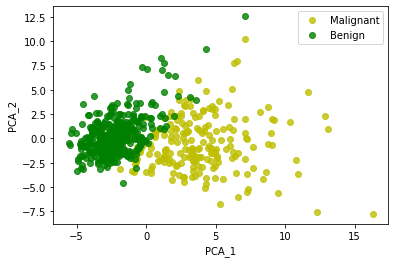

In [41]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][df.diagnosis == 'M'],PCA_df['PCA_2'][df.diagnosis == 'M'],'o', alpha = 0.8, color = 'y')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 'B'],PCA_df['PCA_2'][df.diagnosis == 'B'],'o', alpha = 0.8, color = 'g')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [42]:
var= pca.explained_variance_ratio_

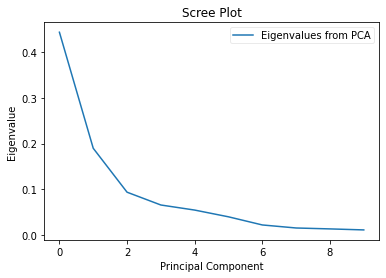

In [43]:
var= pca.explained_variance_ratio_
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

##MODEL BUILDING
#TRAINING

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix

##KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_predict =knn_model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [48]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

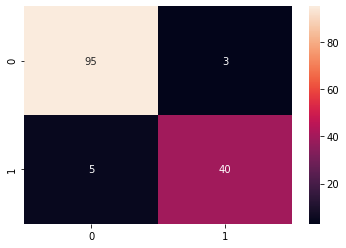

In [49]:
sns.heatmap(cm ,annot=True)

In [50]:
print("Training_set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test_set Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

Training_set Accuracy:  0.9483568075117371
Test_set Accuracy:  0.9440559440559441


In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.93      0.89      0.91        45

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



##SVM

In [52]:
from sklearn.svm import SVC

In [53]:
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [54]:
y_predict =svm_model.predict(X_test)

In [55]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

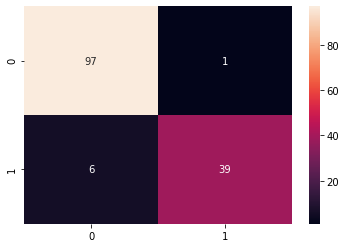

In [56]:
sns.heatmap(cm ,annot=True)

In [57]:
print("Training_set Accuracy: ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print("Test_set Accuracy: ", metrics.accuracy_score(y_test, svm_model.predict(X_test)))

Training_set Accuracy:  0.9694835680751174
Test_set Accuracy:  0.951048951048951


In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.97      0.87      0.92        45

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



##DECISION TREE 

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [61]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train_scaler,y_train)
y_pred_Df = clf.predict(X_test_scaler)

In [62]:
print("Training_set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train_scaler)))
print("Test_set Accuracy:",metrics.accuracy_score(y_test, y_pred_Df))

Training_set Accuracy:  0.9624413145539906
Test_set Accuracy: 0.9370629370629371


In [63]:
print(classification_report(y_test,y_pred_Df))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        98
           1       0.95      0.84      0.89        45

    accuracy                           0.94       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.94      0.94      0.94       143

